### env
linux  
tensorflow-gpu  
python = 3.x  

In [1]:
! nvidia-smi # if you have nvidia gpu

/bin/sh: nvidia-smi: command not found


In [2]:
import os
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '' # using only cpu
#os.environ['CUDA_VISIBLE_DEVICES'] = '0' # using gpu:0
#os.environ['CUDA_VISIBLE_DEVICES'] = '1' # using gpu:1
#... => this code do not mean using multi gpu, only specific one gpu

In [3]:
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input

Using TensorFlow backend.


In [4]:
model = ResNet50(weights='imagenet', include_top=True)

In [14]:
from PIL import Image
from io import BytesIO
import requests
import numpy as np

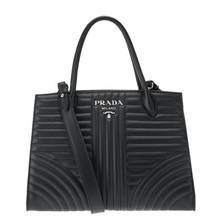

In [15]:
sample_image_url = 'http://i.011st.com/ex_t/R/400x400/1/85/0/src/pd/18/1/4/2/1/5/5/cDncE/2022142155_B.jpg'
response = requests.get(sample_image_url)
img = Image.open(BytesIO(response.content))
img = img.resize((224,224),Image.ANTIALIAS)
img = img.convert("RGB")
img

In [18]:
img_data = image.img_to_array(img)
img_data = np.expand_dims(img,axis=0)
img_data = img_data.copy()
img_data = img_data.astype("float32")
img_data = preprocess_input(img_data)

In [19]:
%%time
for i in range(1000):
    model.predict(img_data)

CPU times: user 19min 30s, sys: 1min 24s, total: 20min 55s
Wall time: 3min 32s
